# Headmapping for the deaths in two maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.misc.pilutil import imread
import matplotlib.cm as cm

In [2]:
# Load the data and read as the csv
deaths1 = pd.read_csv("pubg-match-deaths-dataset/deaths/kill_match_stats_final_0.csv")
deaths2 = pd.read_csv("pubg-match-deaths-dataset/deaths/kill_match_stats_final_1.csv")

In [3]:
# conbine the csvfiles
deaths = pd.concat([deaths1, deaths2])

In [4]:
# print the first 5 line
print (deaths.head(),'\n',len(deaths))

      killed_by       killer_name  killer_placement  killer_position_x  \
0       Grenade   KrazyPortuguese               5.0          657725.10   
1        SCAR-L  nide2Bxiaojiejie              31.0           93091.37   
2          S686          Ascholes              43.0          366921.40   
3  Down and Out        Weirdo7777               9.0          472014.20   
4          M416         Solayuki1               9.0          473357.80   

   killer_position_y      map  \
0           146275.2  MIRAMAR   
1           722236.4  MIRAMAR   
2           421623.9  MIRAMAR   
3           313274.8  MIRAMAR   
4           318340.5  MIRAMAR   

                                            match_id  time      victim_name  \
0  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   823  KrazyPortuguese   
1  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   194      X3evolution   
2  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   103          CtrlZee   
3  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2v

In [6]:
# load the two maps
miramar = deaths[deaths["map"] == "MIRAMAR"]
erangel = deaths[deaths["map"] == "ERANGEL"]

In [7]:
# headmap for the first 100 seconds of the game
position_data = ["killer_position_x","killer_position_y","victim_position_x","victim_position_y"]
for position in position_data:
    miramar[position] = miramar[position].apply(lambda x: x*1000/800000) # miramar map
    miramar = miramar[miramar[position] != 0]
    
    erangel[position] = erangel[position].apply(lambda x: x*4096/800000) # erangel map
    erangel = erangel[erangel[position] != 0]

n = 50000
mira_sample = miramar[miramar["time"] < 100].sample(n)
eran_sample = erangel[erangel["time"] < 100].sample(n)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


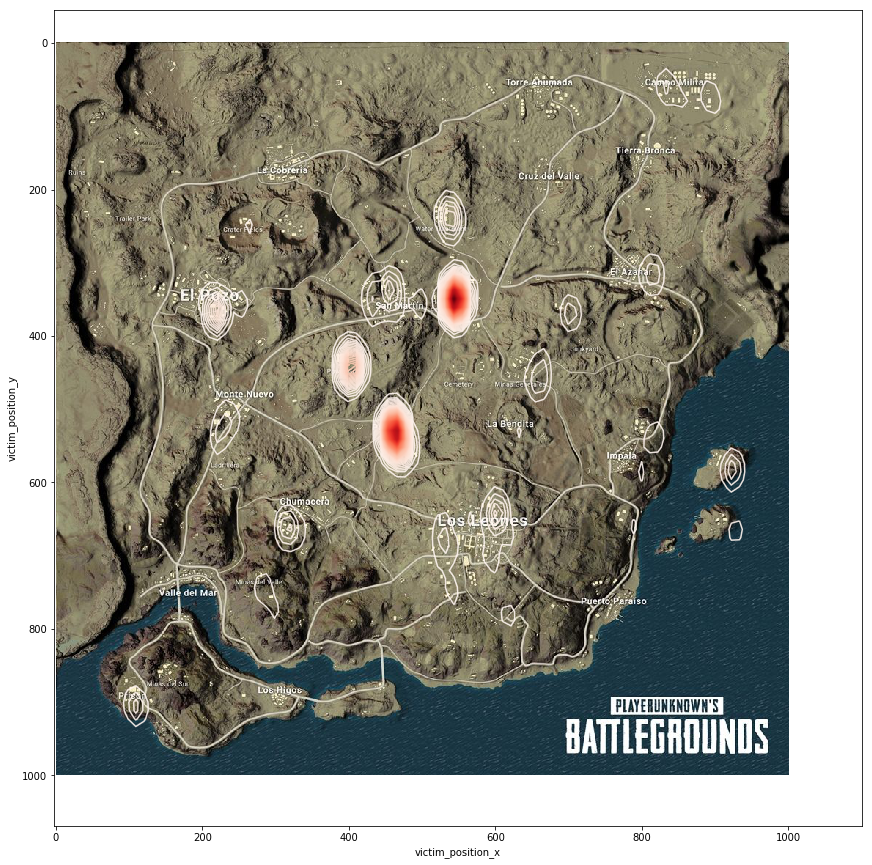

In [9]:
# headmap for miramar
bg = imread("pubg-match-deaths-dataset/miramar.jpg")
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(bg)
sns.kdeplot(mira_sample["victim_position_x"], mira_sample["victim_position_y"],n_levels=100, cmap=cm.Reds, alpha=0.9)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


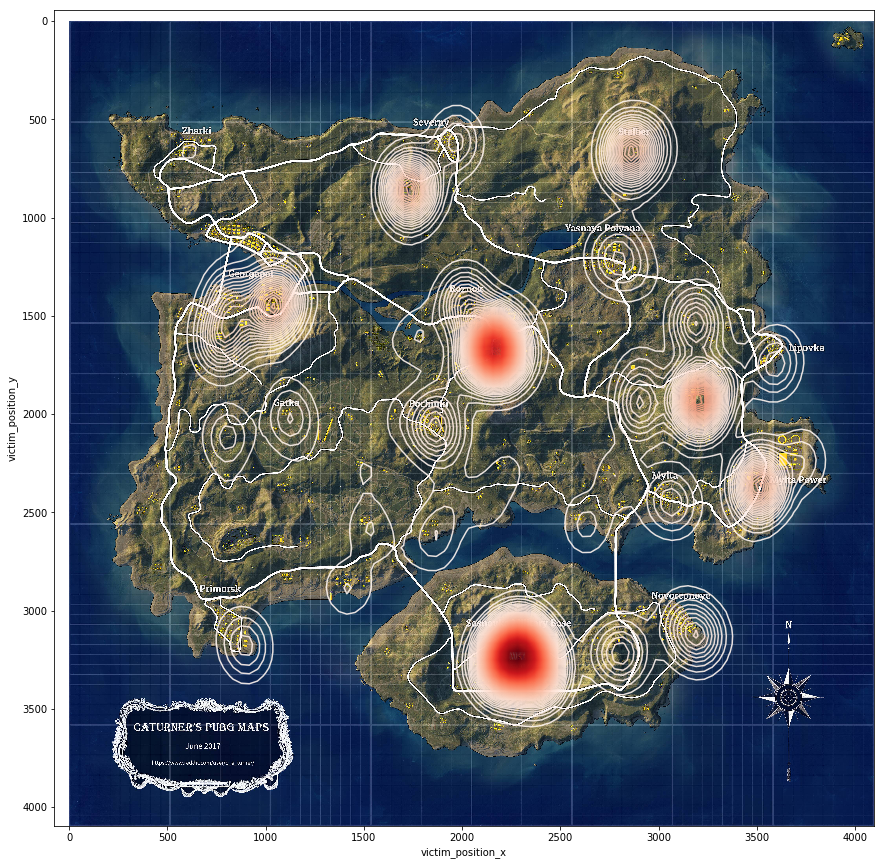

In [11]:
# headmap for erangel
bg = imread("pubg-match-deaths-dataset/erangel.jpg")
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(bg)
sns.kdeplot(eran_sample["victim_position_x"], eran_sample["victim_position_y"], n_levels=100,cmap=cm.Reds, alpha=0.9)